In [43]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data = 'data/city_data.csv'
ride_data = 'data/ride_data.csv'

# Read the City and Ride Data
city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, how='left', on='city')

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [44]:
# Obtain the x and y coordinates for each of the three city types
urban_type = combined_data[combined_data['type'] == 'Urban'].groupby([combined_data['city']])
suburban_type = combined_data[combined_data['type'] == 'Suburban'].groupby([combined_data['city']])
rural_type = combined_data[combined_data['type'] == 'Rural'].groupby([combined_data['city']])

#total number of rides per type 
x_urban = urban_type['ride_id'].count()
x_suburban = suburban_type['ride_id'].count()
x_rural = rural_type['ride_id'].count()

#average fare per city type
y_urban = urban_type['fare'].mean()
y_suburban = suburban_type['fare'].mean()
y_rural = rural_type['fare'].mean()

# driver count per city type
s_urban = urban_type['driver_count'].mean()
s_suburban = suburban_type['driver_count'].mean()
s_rural = rural_type['driver_count'].mean()

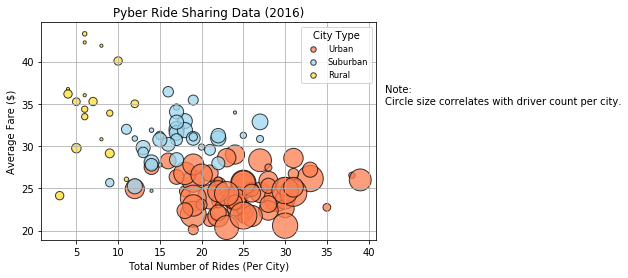

In [45]:
# Colors
u_color = '#FC7D4F'
s_color = '#9FD7EF'
r_color = '#FFDF33'

# Build the scatter plots for each city types
urban_plot = plt.scatter(x_urban, y_urban,s= s_urban * 10,  c = u_color, marker = 'o', edgecolors = 'black', alpha = 0.75)
suburban_plot = plt.scatter(x_suburban, y_suburban, s= s_suburban * 10, c = s_color, marker = 'o', edgecolors = 'black', alpha = 0.75)
rural_plot = plt.scatter(x_rural, y_rural, s= s_rural * 10, c = r_color, marker = 'o', edgecolors = 'black', alpha = 0.75)


# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend
lgd = plt.legend(labels=['Urban','Suburban', 'Rural'],title = 'City Type', fontsize='small', loc = 'best')
lgd.legendHandles[0]._sizes = [30]
lgd.legendHandles[1]._sizes = [30]
lgd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig('../Pyber/Images/bubble_plot.png')

# Show plot
plt.show()



## Total Fares by City Type

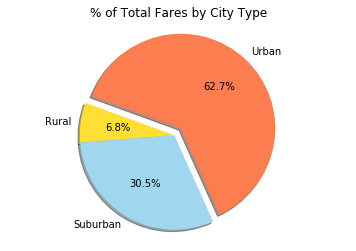

In [46]:
# Calculate Type Percents
city_type_group = combined_data.groupby('type')
city_type_total_fares = city_type_group['fare'].sum()
labels = ['Rural', 'Suburban','Urban']
colors=[r_color, s_color,u_color ]
explode = [0, 0, 0.1 ]

# Build Pie Chart
plt.title('% of Total Fares by City Type')
plt.pie(city_type_total_fares, explode = explode, labels = labels, colors = colors, shadow = True,
        autopct = '%1.1f%%', startangle = 160)
plt.axis("equal")

# Save Figure
plt.savefig('../Pyber/Images/pie_total_fares.png')

plt.show()

## Total Rides by City Type

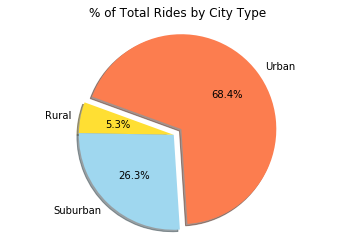

In [47]:
# Calculate Ride Percents
city_type_total_rides = city_type_group['ride_id'].count()
labels = ['Rural', 'Suburban','Urban']
colors=[r_color, s_color,u_color]
explode = [0, 0, 0.1]

# Build Pie Chart
plt.title('% of Total Rides by City Type')
plt.pie(city_type_total_rides, explode = explode, labels = labels, colors = colors, shadow = True,
        autopct = '%1.1f%%', startangle = 160)

plt.axis("equal")
# Save Figure
plt.savefig('../Pyber/Images/pie_total_rides.png')

plt.show()




## Total Drivers by City Type

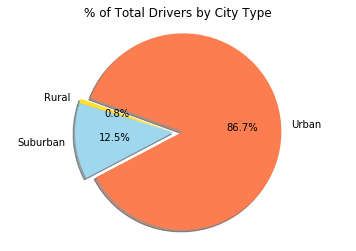

In [42]:
# Calculate Driver Percents
city_type_total_drivers = city_type_group['driver_count'].sum()
labels = ['Rural', 'Suburban','Urban']
colors=[r_color, s_color,u_color]
explode = [0, 0, 0.1]

# Build Pie Chart
plt.title('% of Total Drivers by City Type')
plt.pie(city_type_total_drivers, explode = explode, labels = labels, colors = colors, shadow = True,
        autopct = '%1.1f%%', startangle = 160)
plt.axis("equal")

#Save Figure
plt.savefig('../Pyber/Images/pie_total_rides.png')

plt.show()
